# Gentle Introduction to Big Data in Astronomy and Basics...

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/) for the 2nd IAA-CSIC Severo Ochoa School on Statistics, Data Mining, and Machine Learning

<a id='toc'></a>

## This notebook includes:

[A super quick introduction to ipython (jupyter) notebooks](#notebooks)

[Quick Introduction to Big Data in Astronomy (and LSST)](#intro)

[Basics about statistics](#basics) 

[Distributions and Random samples](#randoms)

[Robust statistics](#robust)

[Exploratory Data Analysis](#EDA)

## A super quick introduction to ipython (jupyter) notebooks  <a id='notebooks'></a>
[Go to top](#toc)
 

### How to use the notebook

*If you're familiar with IPython notebooks, you can probably skip this section without missing anything.*

In this notebook, we'll cover some basic concepts in statistical data analysis. 

IPython notebooks work by running a fully functional Python sever behind the scenes and if you're reading this then you probably already figured out how to get that running. Then, inside the notebook, the content is divided into cells containing code or text.

You'll be asked to edit a few of the cells below to add your own code. To do this, click on the cell to start editing and then type as you normally would. To execute the code contained in the cell, press `Shift-Enter`. Even for existing cells that you don't need to edit, you should select them and type `Shift-Enter` when you get there because the cells below generally depend on the previous cells being executed first.

To get started, edit the cell below to assign your name (or whatever you want) to the variable `name` and then press `Shift-Enter` to execute the cell.

In [22]:
import os
name = os.getlogin()
print("Hello {0}!".format(name))

Hello ivezic!


If this works, the output should greet you without throwing any errors. If so, that's pretty much all we need so let's get started!

# Quick Introduction to Big Data in Astronomy <a id='intro'></a>
[Go to top](#toc)
 

### Ever increasing data volume and complexity                           

- SDSS is ~30 TB; 

- LSST will be one SDSS per night, or a total of >100 PB of data 
(about 40 billion objects, over 30,000 billion forced measurements); 

- also Gaia and many other surveys                                                          

- who and how will do the required data analysis? 


### Sophisticated analysis, need for reproducability     

- with the increasing data complexity, analysis becomes more complex, too

- what do we do in case of disagreement? 


### Open-source approach improves efficiency                             

- we are not data starved any more!                                        

- the bottleneck for new results is in human resources (as in “grad students and postdocs”) and analysis tools                                                                           
- nobody has an unlimited budget; we are a small field and we should collaborate and share!

# Quick Introduction to LSST
 

![SlideGrab](figures/lsst0.png)

![SlideGrab](figures/lsst1.png)

![SlideGrab](figures/lsst2.png)

![SlideGrab](figures/lsst3.png)

![SlideGrab](figures/lsst4.png)

![SlideGrab](figures/lsst4a.png)

![SlideGrab](figures/lsst5.png)

![SlideGrab](figures/lsst6.png)

![SlideGrab](figures/lsst7.png)

# Basics about statistics <a id='basics'></a>
[Go to top](#toc)

### These topics will be covered in a much more systematic way by Gwen! 

#### Learning goals: 
- Probability Rules (notation, definitions, conditional probability, Bayes Rule).
- How do I robustly estimate location and scale parameters of a one-dimensional data set?  
- Statistical distributions and how do we describe them? 
- Estimators, location and scale, sample vs. population, bias and scatter.

### Notation and Variables

First we need to go over some of the notation that the book uses.   

$x$ is a scalar quantity, measured $N$ times

$x_i$ is a single measurement with $i=1,...,N$

$\{x_i\}$ refers to the set of all N measurements

### Parametric vs. Non-parametric

If we are attempting to guess a *model* for $h(x)$, then the process is *parametric*.  With a model solution we can generate new data that should mimic what we measure.

If we are not attempting to guess a model, then the process is *nonparametric*.  That is we are just trying to describe the data that we see in the most compact manner that we can, but we are not trying to produce mock data.

## Probability

The probability of $A$, $p(A)$, is the probability that some event will happen (say a coin toss), or if the process is continuous, the probability of $A$ falling in a certain range.  (N.B., Technically these two things are different and sometimes are indicated by $P$ and $p$, but we'll ignore that here).

$p(A)$ must be positive definite for all $A$ and the sum/integral of the pdf must be unity.

If we have two events, $A$ and $B$, the possible combinations are illustrated by the following figure:
![Figure 3.1](http://www.astroml.org/_images/fig_prob_sum_1.png)

$A \cup B$ is the *union* of sets $A$ and $B$.

$A \cap B$ is the *intersection* of sets $A$ and $B$.

The probability that *either* $A$ or $B$ will happen (which could include both) is the *union*, given by

$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$

The figure makes it clear why the last term is necessary.  Since $A$ and $B$ overlap, we are double-counting the region where *both* $A$ and $B$ happen, so we have to subtract this out.  


The probability that *both* $A$ and $B$ will happen, $p(A \cap B)$, is 

$$p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$

where p(A|B) is the probability of A *given that* B is true and is called the *conditional probability*.  So the $|$ is short for "given that".

In other words: *"The probability that both A and B have occured is equal to the probability B has occured times the probability that A will occur if B occured".*

If events B_i are disjoint and their union is the set of all possible outcomes, then the **law of total probability** says that:

$$p(A) = \sum_ip(A|B_i)p(B_i)$$

Example:

    A = hit head on door frame, B = { is tall, is average, is short }
    P(A) = P(A|is tall) + P(B|is average) + P(C|is short)

N.B.  Just to be annoying, different people use different notation and the following all mean the same thing

$$p(A \cap B) = p(A,B) = p(AB) = p(A \,{\rm and}\, B)$$

We will use the comma notation. 

It is important to realize that the following is *always* true
$$p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

However, if $A$ and $B$ are ***independent***, then 

$$p(A,B) = p(A)p(B)$$

Example:

     John is successful and John is a Libra.
     
In other words, ***knowing A happened tells us nothing about whether B happened (or will happen), and vice versa***.
 

Need more help with this? Try watching some Khan Academy videos and working through the exercises: https://www.khanacademy.org/math/probability/probability-geometry

https://www.khanacademy.org/math/precalculus/prob-comb

## Bayes' Rule

We've seen that the probability of $x$ and $y$ occurring can be written as:

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the ***marginal probability*** as

$$p(x) = \int p(x,y)dy,$$

where marginal means the probability of $x$ occurring irrespective what $y$ is. This is essentially projecting on to one axis (integrating over the other axis, see the figure in the Notebook, below).

Given these two, we can write:

$$p(x) = \int p(x|y)p(y) dy$$

This is just the law of total probability, but for continous variables.

**Note:** this is related to a much broader and deeper concept of Bayesian Statistics,
which Gwen will introduce tomorrow. 

## Marginal and conditional probability distributions

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are *not* independent as, once you pick a $y$, your values of $x$ are constrained.

The *marginal* distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the *conditional* probability (of $x$) for three $y$ values: $$p(x|y=y_0)$$  These are just "slices" through the 2-D distribution.

![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)

Then, again starting with:

$$p(x|y)p(y) = p(y|x)p(x)$$

we can write:

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as 
Gwen will discuss it later...

## Distributions and Random samples <a id='randoms'></a>
[Go to top](#toc)

##### Learning goals: 
- How do I use python to generate various statistical distributions, such as Gaussian, Cauchy, Laplace, etc.? 

## Statistical distributions

Typically, we collect some *samples* (series of measurements, or catalogs of stars) that can be thought of as being drawn from som underlying distribution (e.g., distribution of errors, or the distribution of stars in the Milky Way).

We often don't care much about the individual samples, other than to use them ***to learn more about the underlying distributions and their properties (e.g., the mean (location), width (scale), etc.)***. How do we do that?

![SlideGrab](figures/p5.jpg)

Normal probability density function (pdf): $$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

Cumulative distribution function (cdf): $$\Phi(x|\mu,\sigma) = \int_{-\infty}^{x}  p(x'|\mu,\sigma) dx' $$
$$\Phi(\infty|\mu,\sigma) = 1.$$

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

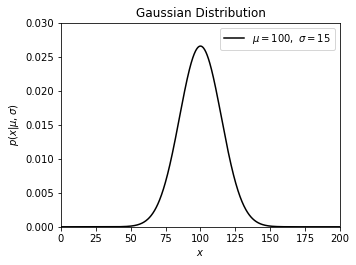

In [24]:
## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)
## see http://www.astroml.org/book_figures/chapter3/fig_gaussian_distribution.html
## Example: IQ is (by definition) distributed as N(mu=100,sigma=15)
## Let's plot the IQ distribution first
# generate distribution for a grid of x values
x = np.linspace(0, 200, 1000)
mu=100
sigma=15
gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)
# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

In [25]:
## above we used probability density function (astronomers like to call it "differential" df)
## the cumulative distribution function, cdf, is the integral of pdf from $x'=-\infty$ to $x'=x$
# What fraction of people have IQ>145 (in other words, what fraction of people are "3-sigma" above the average?
gaussCDF = norm(mu, sigma).cdf(145)
print (1-gaussCDF)

0.0013498980316301035


In [26]:
# What IQ corresponds to a "one in a million people genius"? 
nSigma = norm.ppf(1-1.0e-6)
# norm.ppf returns x for specified cdf, assuming mu=0 and sigma=1 ("standard normal pdf")
IQ = mu + nSigma*sigma
print('nSigma=',nSigma)
print('IQ=', IQ)

nSigma= 4.753424308817087
IQ= 171.3013646322563


In [27]:
# let's now look at the same problems using a sample of million points drawn from N(100,15)
sampleSize=1000000 
gaussSample = norm(mu, sigma).rvs(sampleSize) 
# What fraction of people have IQ>145?
smartOnes = gaussSample[gaussSample>145]
print (1.0*np.size(smartOnes)/sampleSize)

0.001358


In [28]:
# What IQ corresponds to "one in a million"?  
print(np.max(gaussSample))

170.87505284030544


## Why do the two sets of results differ (0.00135 vs. 0.00138 and 171.3 vs. 176.8)?

In [29]:
def printStats(v):
    print('Size:', np.size(v))
    print('min:', np.min(v))
    print('max:', np.max(v))
    print('mean:', np.mean(v))
    print('median:', np.median(v))
    print('st.dev.:', np.std(v))

In [30]:
printStats(gaussSample)

Size: 1000000
min: 29.78689361798598
max: 170.87505284030544
mean: 100.01379655452168
median: 100.01083293444948
st.dev.: 15.000675354628846


In [31]:
printStats(smartOnes)

Size: 1358
min: 145.00593437533388
max: 170.87505284030544
mean: 149.38191080721273
median: 148.2403477419181
st.dev.: 4.080215254088358


In [32]:
# What about the other end of the spectrum?
print('N(50 < IQ < 71):    ', np.size(gaussSample[(gaussSample>50) & (gaussSample<71)]))
print('N(26 < IQ < 51):    ', np.size(gaussSample[(gaussSample>26) & (gaussSample<51)]))

N(50 < IQ < 71):     25908
N(26 < IQ < 51):     527


### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is
$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$
For $a=b=1\sigma$, we get the familar result of 68.3%.  For $a=b=2\sigma$ it is 95.4%.  So we refer to the range $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$ as the 68% and 95% **confidence limits**, respectively.

In [33]:
## now let's go back to the problem of estimating location and scale
## given a sample, such as gaussSample above, how do we estimate its mu and sigma?

![SlideGrab](figures/p4.jpg)

![SlideGrab](figures/p3.jpg)

### Sample vs. Population Statistics 

Statistics estimated from the *data* are called _sample statistics_ as compared to _population statistics_ which come from knowing the functional form of the pdf. For example, the expectation value for a known h(x) is

$$\mu \equiv E(x) = \int_{-\infty}^{\infty} x h(x) dx,$$

where $h(x)$ must be properly normalized (the integral gets replaced by a sum for discrete distributions).

E(x) is the expecation value of $x$.  If you want the expectation value of something else--say $x^2$ or $(x-\mu)^2$, you replace $x$ with that. Importantly, the *variance* is the expectation value of $(x-\mu)^2$

$$\sigma^2 \equiv V = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where, again, the integral gets replaced by a sum for discrete distributions.

Specifically, $\mu$ is the *population average*, i.e., it is the expecation value of $x$ for $h(x)$.  But we don't *know* $h(x)$! So we do the next best thing, and estimate it from the data:

$$ \hat{h}(x) = \sum_{i=1}^N \frac{\delta_(x - x_i)}{N}$$

Plugging into the previous equations, we derive the **sample mean**, $\overline{x}$ as an *estimator* of $\mu$ and defined as
$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$
which we determine from the data itself. We'll hear more about estimators in Week 4.

Similarly, the **sample variance** ($s^2$, where 
$s$ is the sample standard deviation) is an *estimator* of $\sigma^2$:
$$s^2 \equiv \frac{1}{N-1}\sum_{i=1}^N (x_i-\overline{x})^2.$$

**WAIT!!!** Why do we have (N-1) and not N (as in expression for the mean)???

The reason for the (N-1) term instead of the naively expected N in the second expression is related to the fact that $\overline{x}$ is also determined from data (we will discuss this subtle fact and the underlying statistical justification for the (N-1) term in more detail in Week 4 lectures. With N replaced by (N-1) (the so-called Bessel’s correction), the sample variance (i.e., $\sigma^2$) becomes unbiased (and the sample standard deviation becomes a less biased, but on average still underestimated, estimator of the true standard deviation). 

What does "biased" mean? 

![SlideGrab](figures/p13.jpg)

![SlideGrab](figures/p10.jpg)

![SlideGrab](figures/p11.jpg)

![SlideGrab](figures/p12.jpg)

![SlideGrab](figures/p8.jpg)

## WARNING: do not overinterpret simple statistics!

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. 

![SlideGrab](figures/AnscombeQuartet.jpg)

![SlideGrab](figures/AnscombeQuartetTable.jpg)



## Robust statistics <a id='robust'></a>
[Go to top](#toc)

### Learning goals: 
- How do I *robustly* estimate location and scale parameters of a one-dimensional data set?  

**Robust** here means insensitive to outliers; for example, a single data point 
in a sample with a value going to infinity will result in the sample mean also
going to infinity -- therefore, the sample mean is **not** a robust estimator.

However, the sample median **is** a robust estimator: not only a single data point,
but essentially 50% of all points can have values going to infinity and the sample median
will remain unchanged! 

The price to pay for robustness is about 25\% larger uncertainty for the median than for the mean
(in case of Gaussian distribution). 

Similarly, to estimate the distribution width, instead of using standard deviation we
can use the interquartile range: 

$\sigma_G = 0.7413 \, (q_{75} − q_{25}) $ 

Let us discuss robust statistics in more detail, and with numerical examples... 

## Numerical example: robust statistics for Cauchy distribution

Using astroML figure 3.12 as a template, see

http://www.astroml.org/book_figures/chapter3/fig_cauchy_median_mean.html

add another panel, similar to the top panel, that will plot and compare 
results for standard deviation and $\sigma_G$. 


![SlideGrab](figures/mmCauchy.png)

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.stats import sigmaG

In [35]:
def robust_mean_mixture(x):
    """Compute the mean via a mixture of two Gaussians

    One Gaussian accounts for outliers, and one Gaussian accounts  for
    the true distribution.  This cannot be computed analytically, so
    it uses scipy's function optimization
    """
    if len(x) == 1:
        return x
    
    x = x.ravel()

    ## NOTE: the "outlier" distribution is *assumed* 3 times wider than the "core" (true) distribution
    sig_bg = 3 * np.std(x)
    # same mean for both distributions 
    mu_bg = np.mean(x)
    
    # define likelihood for the two-component probability distribution
    likelihood = lambda v: -np.sum(np.log(norm.pdf(x, v[0], v[1])
                                          + norm.pdf(x, mu_bg, sig_bg)))
    
    # initial guess for (mu, sigma) of the core distribution
    v0 = np.array([0, 30])

    # Minimize a function using the downhill simplex algorithm.
    # This algorithm only uses function values, not derivatives or second derivatives.
    # for more details, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html
    v_best = optimize.fmin(likelihood, v0, disp=False)

    return v_best[0]


def robust_mean_iterated(x, sigma_cut=3):
    """Compute the robust mean iteratively

    After computing the mean, points further than 3 sigma (adjustable) from 
    the mean are removed and the result is repeated until convergence.
    """
    flag = np.ones(x.shape, dtype=bool)
    n_to_keep = x.size

    while True:
        xf = x[flag]
        mu = xf.mean()
        sig = xf.std()
        if len(xf) == 1:
            break

        x_sig = abs((x - mu) / sig)

        too_far = (x_sig > sigma_cut)
        flag[too_far] = False
        n_flag = flag.sum()

        if n_flag == n_to_keep:
            break
        else:
            n_to_keep = n_flag

    return mu
 

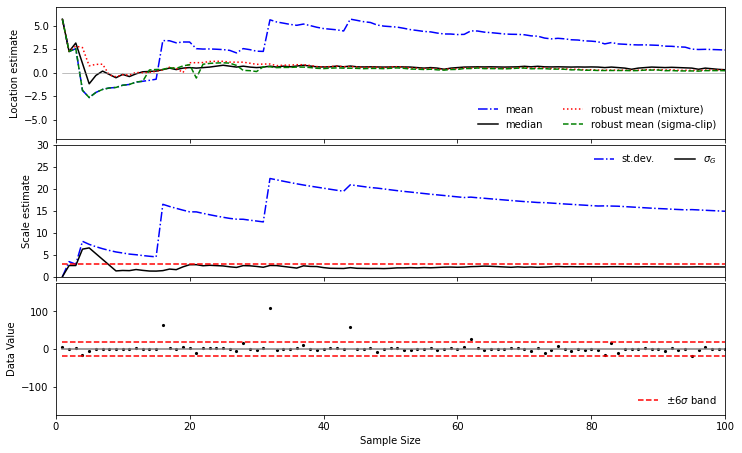

In [36]:
#------------------------------------------------------------
# Create the distribution and compute means and medians
# for repeatability of results
np.random.seed(6)
# parameters for the Cauchy distribution 
mu = 0
gamma = 2
Ndata = 100
# generate data
xi = cauchy(mu, gamma).rvs(Ndata)
Nrange = np.arange(1, len(xi) + 1)

mean = [np.mean(xi[:N]) for N in Nrange]
median = [np.median(xi[:N]) for N in Nrange]
mean_mixture = [robust_mean_mixture(xi[:N]) for N in Nrange]
mean_iter = [robust_mean_iterated(xi[:N]) for N in Nrange]

# additions
stdev = [np.std(xi[:N]) for N in Nrange]
sigG = [sigmaG(xi[:N]) for N in Nrange]

# Plot the results as a function of number of points
fig = plt.figure(figsize=(12, 7.5))
fig.subplots_adjust(hspace=0.05)

# first plot the mean and median
ax = fig.add_subplot(311)
ax.plot(Nrange, mean, '-.b', label='mean')
ax.plot(Nrange, median, '-k', label='median')
ax.plot(Nrange, mean_mixture, ':r', label='robust mean (mixture)')
ax.plot(Nrange, mean_iter, '--g', label='robust mean (sigma-clip)')
ax.plot(Nrange, 0 * Nrange, '-', c='gray', lw=0.5)

ax.set_xlim(0, 100)
ax.set_ylim(-7, 7)
ax.legend(loc=4, ncol=2, frameon=False)
ax.set_ylabel('Location estimate')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# and here plot the sigma and sigmaG
ax = fig.add_subplot(312)
ax.plot(Nrange, stdev, '-.b', label='st.dev.')
ax.plot(Nrange, sigG, '-k', label='$\sigma_G$')
## sigmaG for Cauchy distribution (proportional to gamma)
ax.plot(Nrange, (1.483*gamma+0 * Nrange), '--', c='red')
ax.set_xlim(0, 100)
ax.set_ylim(0, 30)
ax.legend(loc='upper right', ncol=2, frameon=False)
ax.set_ylabel('Scale estimate')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# now plot the data values
ax = fig.add_subplot(313)
ax.scatter(Nrange, xi, lw=0, s=10, c='k')
ax.plot(Nrange, 0 * Nrange, '-', c='gray')
ax.set_xlim(0, 100)
ax.set_ylim(-175, 175)
## +-6*sigmaG for Cauchy distribution
## Q3 - Q1 = 2 * gamma for Cauchy distribution
## sigmaG = 0.7413 * (Q3-Q1)
## let's mark "once in a billon" deviation (approx. 6 sigma deviation)
ax.plot(Nrange, (6*1.483*gamma+0 * Nrange), '--', c='red', label='$\pm6\sigma$ band')
ax.plot(Nrange, (-6*1.483*gamma+0 * Nrange), '--', c='red')
ax.legend(loc=4, ncol=2, frameon=False)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Data Value')
plt.show()

### Discussion

- note that the median estimates the distribution location parameter much better than the mean
- note that $\sigma_G$ estimates the distribution width parameter much better than standard deviation
- the dashed lines in the bottom panel mark $\pm6 \sigma$ range. The probability of such large excursions for a    Gaussian distribution with the same width ($\sigma_G$) is one in a billion 
 

## Exploratory Data Analysis (EDA) <a id='EDA'></a>
[Go to top](#toc)


- real data are dirty, typically there are lots of NaN's and non-Gaussian outliers 

- often we start with scatter plots, contour plots, looking for low-dimensional projections that "make sense"

- many of EDA steps can be eventually automated but typically we first "get our hands dirty"  


### Let's try a few examples, first contour plotting and then multi-dimensional (4D) visualization


In [37]:
! curl -O https://raw.githubusercontent.com/astroML/astroML/master/examples/datasets/plot_SDSS_SSPP.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3049  100  3049    0     0   5617      0 --:--:-- --:--:-- --:--:--  5615


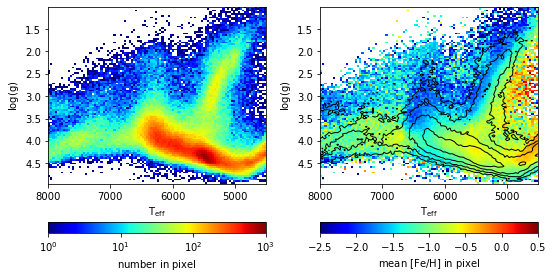

<Figure size 432x288 with 0 Axes>

In [38]:
%matplotlib inline
%run ./plot_SDSS_SSPP.py

In [39]:
! curl -O https://raw.githubusercontent.com/astroML/astroML/master/examples/datasets/plot_moving_objects.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3723  100  3723    0     0  16509      0 --:--:-- --:--:-- --:--:-- 16546


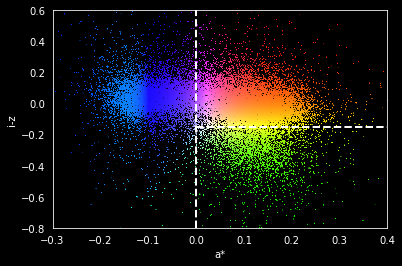

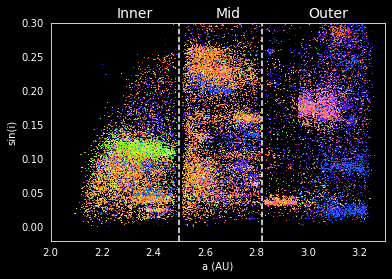

<Figure size 432x288 with 0 Axes>

In [40]:
%run ./plot_moving_objects.py

## Here is how it's done:

In [41]:
def compute_color(mag_a, mag_i, mag_z, a_crit=-0.1):
    """
    Compute the scatter-plot color using code adapted from
    TCL source used in Parker 2008.
    """
    # define the base color scalings
    R = np.ones_like(mag_i)
    G = 0.5 * 10 ** (-2 * (mag_i - mag_z - 0.01))
    B = 1.5 * 10 ** (-8 * (mag_a + 0.0))

    # enhance green beyond the a_crit cutoff
    i = np.where(mag_a < a_crit)
    G[i] += 10000 * (10 ** (-0.01 * (mag_a[i] - a_crit)) - 1)

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T

In [42]:
# compute RGB color based on magnitudes
color = compute_color(mag_a, mag_i, mag_z)  # makes 2 colors from 3 mags
ax.scatter(a, sini, c=color, s=1, lw=0)     # a and sini are the other two (out of 4) coordinates

## And now work for you!

### Take the above code and instead of plotting the distribution of data sample in the top panel, "paint" instead the entire plane with the same color coding (e.g. pixelize it with small pixels, or produce a sample of points on a regular 2D grid and plot them using square symbol)

### For extra credit: "paint" the unit square (x=0-1, y=0-1) 

 [Go to top](#toc)